In [194]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt
import mdtraj
import urllib.request
import yaml
    
class databank():
    
    def __init__(self,path=r'../../Data/Simulations/'):
        self.path = path
        self.systems = []
        self.__load_systems__(path)

    def __load_systems__(self,path):
        for subdir, dirs, files in os.walk(path):
            for filename in files:
                filepath = os.path.join(subdir, filename)
                #print(filepath)
                if filename == "README.yaml":
                    with open(filepath) as yaml_file:
                        content = yaml.load(yaml_file, Loader=yaml.FullLoader)
                        content['path'] = filepath
                        self.systems.append(content)
                
    def get_systems(self):
        return self.systems
    
    def pie_temperature(self):
        list_feature = [ int(float(system['TEMPERATURE'])) for system in self.systems]
        import collections
        counter = collections.Counter(list_feature)
        plt.pie(counter.values(),labels=counter.keys(), normalize=True)


In [200]:
path = '../../Data/Simulations/'
db_data=databank(path)

In [201]:
db_data.systems[0]

{'DOI': '10.5281/zenodo.3483787',
 'SOFTWARE': 'gromacs',
 'TRJ': [['run.wrapped.xtc']],
 'TPR': [['step7_1.tpr']],
 'PREEQTIME': 0,
 'TIMELEFTOUT': 0,
 'POPC': 'POPC',
 'POPG': 'POPG',
 'SOL': 'TIP3',
 'POT': 'POT',
 'MAPPING_DICT': {'POPC': 'mappingPOPCcharmm.txt',
  'POPG': 'mappingPOPGcharmm.txt',
  'SOL': 'mappingTIP3PCHARMMgui.txt',
  'POT': 'mappingPOT.txt'},
 'DIR_WRK': '/usr/home/bort/Databank',
 'PUBLICATION': None,
 'AUTHORS_CONTACT': 'Jesper J. Madsen',
 'SYSTEM': '250POPC_250POPG_250POT_298K_119974Atoms',
 'SOFTWARE_VERSION': None,
 'FF': 'CHARMM36',
 'FF_SOURCE': 'CHARMM-GUI v1.7',
 'FF_DATE': None,
 'CPT': None,
 'LOG': None,
 'TOP': [['topol.top']],
 'TRAJECTORY_SIZE': 901173616,
 'NPOPC': [125, 125],
 'NPOPG': [125, 125],
 'NPOPS': [0, 0],
 'NPOPE': [0, 0],
 'NDMPC': [0, 0],
 'NDPPC': [0, 0],
 'NPOPI': [0, 0],
 'NSAPI': [0, 0],
 'NSLPI': [0, 0],
 'NCHOL': [0, 0],
 'NDHMDMAB': [0, 0],
 'NPOT': 250,
 'NSOL': 18158,
 'TEMPERATURE': '298',
 'TRJLENGTH': 200100.0,
 'NUMBER_

In [198]:
systems = test.get_systems()
systems[0]

{'DOI': '10.5281/zenodo.3483787',
 'SOFTWARE': 'gromacs',
 'TRJ': [['run.wrapped.xtc']],
 'TPR': [['step7_1.tpr']],
 'PREEQTIME': 0,
 'TIMELEFTOUT': 0,
 'POPC': 'POPC',
 'POPG': 'POPG',
 'SOL': 'TIP3',
 'POT': 'POT',
 'MAPPING_DICT': {'POPC': 'mappingPOPCcharmm.txt',
  'POPG': 'mappingPOPGcharmm.txt',
  'SOL': 'mappingTIP3PCHARMMgui.txt',
  'POT': 'mappingPOT.txt'},
 'DIR_WRK': '/usr/home/bort/Databank',
 'PUBLICATION': None,
 'AUTHORS_CONTACT': 'Jesper J. Madsen',
 'SYSTEM': '250POPC_250POPG_250POT_298K_119974Atoms',
 'SOFTWARE_VERSION': None,
 'FF': 'CHARMM36',
 'FF_SOURCE': 'CHARMM-GUI v1.7',
 'FF_DATE': None,
 'CPT': None,
 'LOG': None,
 'TOP': [['topol.top']],
 'TRAJECTORY_SIZE': 901173616,
 'NPOPC': [125, 125],
 'NPOPG': [125, 125],
 'NPOPS': [0, 0],
 'NPOPE': [0, 0],
 'NDMPC': [0, 0],
 'NDPPC': [0, 0],
 'NPOPI': [0, 0],
 'NSAPI': [0, 0],
 'NSLPI': [0, 0],
 'NCHOL': [0, 0],
 'NDHMDMAB': [0, 0],
 'NPOT': 250,
 'NSOL': 18158,
 'TEMPERATURE': '298',
 'TRJLENGTH': 200100.0,
 'NUMBER_

In [207]:
for system in systems:
    for feature in system.items():
        if "PC" in feature[0]:
            if feature[0][0] != 0:
                print(f"{feature} in {system['path']}\n")
    print(system)
    break
        

('POPC', 'POPC') in ../../Data/Simulations/6e5/059/6e50598ebc47c6e57f6d242896be41b8a18de9a6/1c4ab02a568cca02b0eedbdc6c52ea136c2f3c40/README.yaml

('NPOPC', [125, 125]) in ../../Data/Simulations/6e5/059/6e50598ebc47c6e57f6d242896be41b8a18de9a6/1c4ab02a568cca02b0eedbdc6c52ea136c2f3c40/README.yaml

('NDMPC', [0, 0]) in ../../Data/Simulations/6e5/059/6e50598ebc47c6e57f6d242896be41b8a18de9a6/1c4ab02a568cca02b0eedbdc6c52ea136c2f3c40/README.yaml

('NDPPC', [0, 0]) in ../../Data/Simulations/6e5/059/6e50598ebc47c6e57f6d242896be41b8a18de9a6/1c4ab02a568cca02b0eedbdc6c52ea136c2f3c40/README.yaml

{'DOI': '10.5281/zenodo.3483787', 'SOFTWARE': 'gromacs', 'TRJ': [['run.wrapped.xtc']], 'TPR': [['step7_1.tpr']], 'PREEQTIME': 0, 'TIMELEFTOUT': 0, 'POPC': 'POPC', 'POPG': 'POPG', 'SOL': 'TIP3', 'POT': 'POT', 'MAPPING_DICT': {'POPC': 'mappingPOPCcharmm.txt', 'POPG': 'mappingPOPGcharmm.txt', 'SOL': 'mappingTIP3PCHARMMgui.txt', 'POT': 'mappingPOT.txt'}, 'DIR_WRK': '/usr/home/bort/Databank', 'PUBLICATION': Non

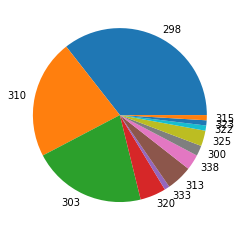

In [202]:
db_data.pie_temperature()

In [97]:
temps = [ int(float(system['TEMPERATURE'])) for system in systems]

TypeError: 'databank' object is not iterable

In [ ]:
import collections
counter = collections.Counter(temps)
plt.pie(counter.values(),labels=counter.keys());

In [ ]:

lipids = [PC,PG, PS, PE, PI]
